<a href="https://colab.research.google.com/github/DoctorVinay8097/DV-lab/blob/main/DV_Lab_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Object detection using FRCNN**

**Faster R-CNN (Region-based Convolutional Neural Network)** is a widely used object detection framework that significantly improved the accuracy and efficiency of object detection tasks.

Here's a brief overview of Faster R-CNN:

* Region Proposal Networks (RPN):

One of the key innovations of Faster R-CNN is the integration of the Region Proposal Network (RPN) into the object detection pipeline. The RPN is a neural network that generates region proposals (bounding boxes) that are likely to contain objects.

* Shared Convolutional Features:

Faster R-CNN shares convolutional features between the RPN and the object detection network.

* Anchor Boxes:

RPN uses anchor boxes with predefined sizes and aspect ratios to propose potential object locations.

* Region-of-Interest Pooling:

Once region proposals are generated by the RPN, they are passed to the object detection network for classification and bounding box regression.

* Object Classification and Bounding Box Regression:

The object detection network is responsible for classifying objects within the proposals and regressing the precise bounding box coordinates.

100%|██████████| 1999639040/1999639040 [00:55<00:00, 35922975.29it/s]


Extracting /root/.cache/torch/hub/checkpoints/VOCtrainval_11-May-2012.tar to /root/.cache/torch/hub/checkpoints


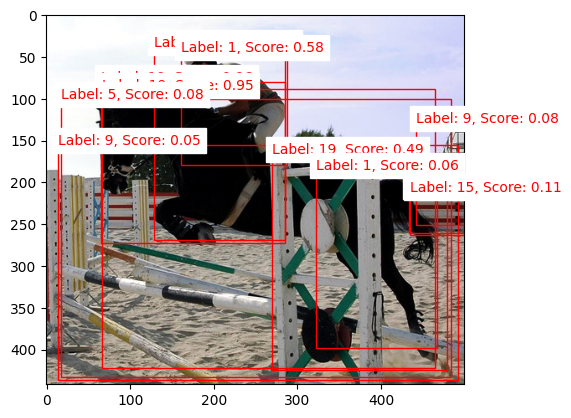

In [ ]:
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from PIL import Image
from torchvision import datasets
import requests
from io import BytesIO

# Load a pre-trained Faster R-CNN model
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Load a built-in image from the Colab datasets
# You can choose from various example datasets, such as 'coco', 'voc', etc.
# Here's an example using the 'voc' dataset:
dataset = datasets.VOCDetection('/root/.cache/torch/hub/checkpoints', '2012', download=True)
image, target = dataset[0]  # Select the first image from the dataset

# Convert image to RGB (if it's not in RGB format)
image = image.convert("RGB")

# Preprocess the image
image_tensor = F.to_tensor(image)
image_tensor = image_tensor.unsqueeze(0)  # Add a batch dimension

# Perform object detection
with torch.no_grad():
    prediction = model(image_tensor)

# Access the predicted bounding boxes, labels, and scores
boxes = prediction[0]['boxes']
labels = prediction[0]['labels']
scores = prediction[0]['scores']

# Display the image with bounding boxes
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots(1)
ax.imshow(image)

for box, label, score in zip(boxes, labels, scores):
    x, y, w, h = box
    rect = patches.Rectangle((x, y), w - x, h - y, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    ax.annotate(f"Label: {label}, Score: {score:.2f}", (x, y), color='r', backgroundcolor='w')

plt.show()